# Distribution Fitting with Sum of Square Error (SSE)
## find best fit by computing the least/minimum residual sum of squares 

In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
#import statsmodels as sm
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [
        st.norm,
        st.powerlaw,
        #st.powerlognorm,
        st.powernorm,
        st.weibull_min,
        st.weibull_max,
        st.dweibull,
        st.erlang,
        st.expon,
        st.exponnorm,
        st.exponweib,
        st.logistic,
        st.loggamma,
        st.loglaplace,
        #st.johnsonsb,
        #st.johnsonsu,
        st.skewnorm,
        st.pareto,
        st.pearson3,
        st.beta,
        st.lognorm,
        st.gengamma
        
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
                    print("distribution: " +str(distribution))
                    print("best_params: " +str(best_params))
                    print("best_sse: " +str(best_sse))

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf



In [2]:
series = pd.read_csv('charcoal_clothing.csv', header=0, index_col=0, squeeze=True)
series = series.drop('Reading ID', axis=1)
series = series.drop('Status', axis=1)
print(series.head())

         Humidity%  Temperature  MQ139  TVOC  eCO2 Detector
Time                                                       
0:00:00       38.7         21.8     87     0   400      OFF
0:00:01       38.7         21.8     87     0   400      OFF
0:00:02       38.9         21.8     88     0   400      OFF
0:00:03       38.9         21.8     88     0   400      OFF
0:00:04       39.0         21.9     89     0   400      OFF


In [3]:
series = series.reset_index()

In [4]:
series.iloc[:,2]

0      21.8
1      21.8
2      21.8
3      21.8
4      21.9
       ... 
913    21.4
914    21.5
915    21.5
916    21.5
917    21.5
Name: Temperature, Length: 918, dtype: float64

In [5]:
data = series.iloc[:,2]
data

0      21.8
1      21.8
2      21.8
3      21.8
4      21.9
       ... 
913    21.4
914    21.5
915    21.5
916    21.5
917    21.5
Name: Temperature, Length: 918, dtype: float64

In [6]:
data.describe()

count    918.000000
mean      21.605991
std        0.107297
min       21.400000
25%       21.500000
50%       21.600000
75%       21.600000
max       21.900000
Name: Temperature, dtype: float64

array([ 57.,   0.,   0., 182.,   0.,   0., 466.,   0.,   0.,  86.,   0.,
         0., 116.,   0.,  11.])

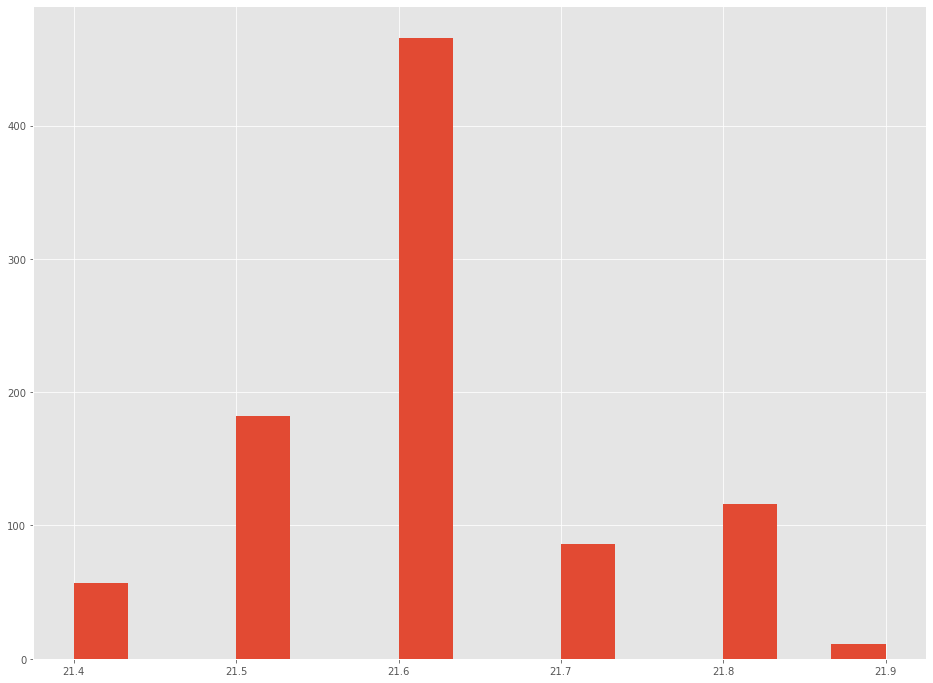

In [7]:
hist, bins, _ = plt.hist(data, bins = 15)
hist

In [8]:
bins

array([21.4       , 21.43333333, 21.46666667, 21.5       , 21.53333333,
       21.56666667, 21.6       , 21.63333333, 21.66666667, 21.7       ,
       21.73333333, 21.76666667, 21.8       , 21.83333333, 21.86666667,
       21.9       ])

#### histogram on log scale. 
#### Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#logbins = np.geomspace(data.min(), data.max(), 200) 
plt.subplot(212)
plt.hist(data, bins=logbins)
plt.xscale('log')
plt.show()

distribution: <scipy.stats._continuous_distns.norm_gen object at 0x000001C28DFA69A0>
best_params: (21.605991285403054, 0.10723829638537502)
best_sse: 50999.981918490674
distribution: <scipy.stats._continuous_distns.powernorm_gen object at 0x000001C28E062310>
best_params: (0.1768332702090284, 21.480115450840284, 0.05832549101856144)
best_sse: 50991.346322838406
distribution: <scipy.stats._continuous_distns.weibull_max_gen object at 0x000001C28DFF2CA0>
best_params: (5.7546884202659125, 22.13547086774352, 0.5719719212641419)
best_sse: 50984.141302338496
distribution: <scipy.stats._continuous_distns.dweibull_gen object at 0x000001C28DFEA130>
best_params: (0.180799114825274, 21.600000000000005, 0.11705497479431284)
best_sse: 44790.0445294828


Text(0, 0.5, 'Frequency')

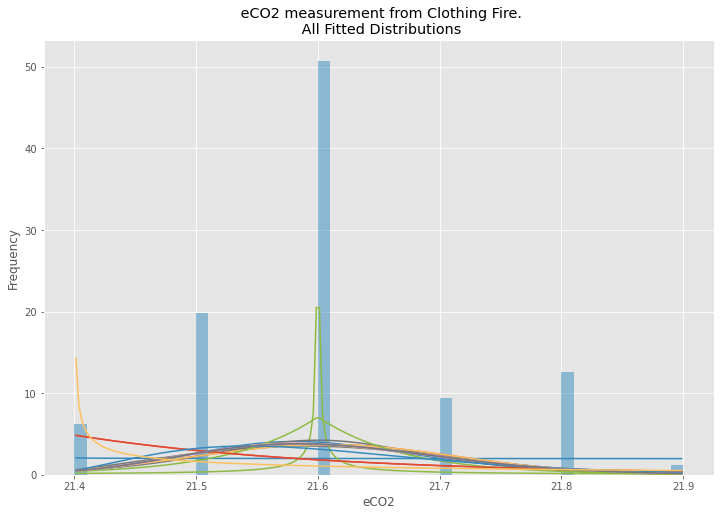

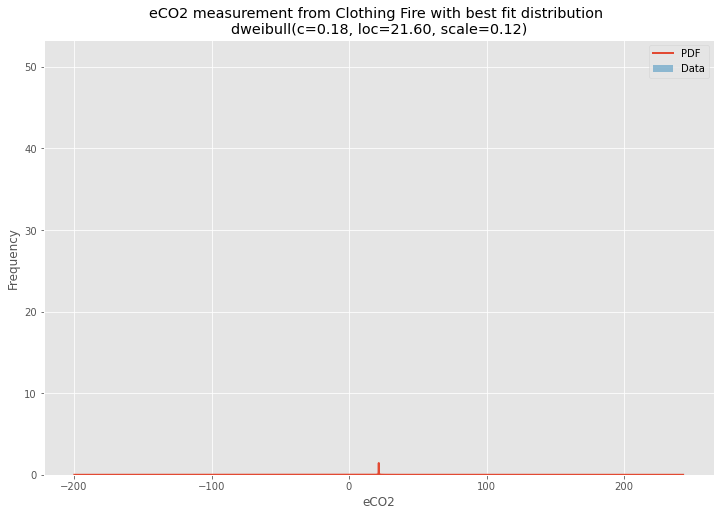

In [9]:

# Plot for comparison
plt.figure(figsize=(12,8))
#ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5) #, color=plt.rcParams['axes.prop_cycle'][1]

ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5,  
               color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u' eCO2 measurement from Clothing Fire.\n All Fitted Distributions')
ax.set_xlabel(u'eCO2')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'eCO2 measurement from Clothing Fire with best fit distribution \n' + dist_str)
ax.set_xlabel(u'eCO2')
ax.set_ylabel('Frequency')